In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/RelaxSilica/"
print("data path: ", data_path)

level: level3 & tutorial name: reactive-silicon-dioxide
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level3/reactive-silicon-dioxide/RelaxSilica/


In [3]:
log = lammps_logfile.File(data_path + "log.lammps")
step = log.get("Step")
qSi = log.get("v_qSi")
qO = log.get("v_qO")
Volume = log.get("Volume")
timestep = 0.5
time = step*timestep

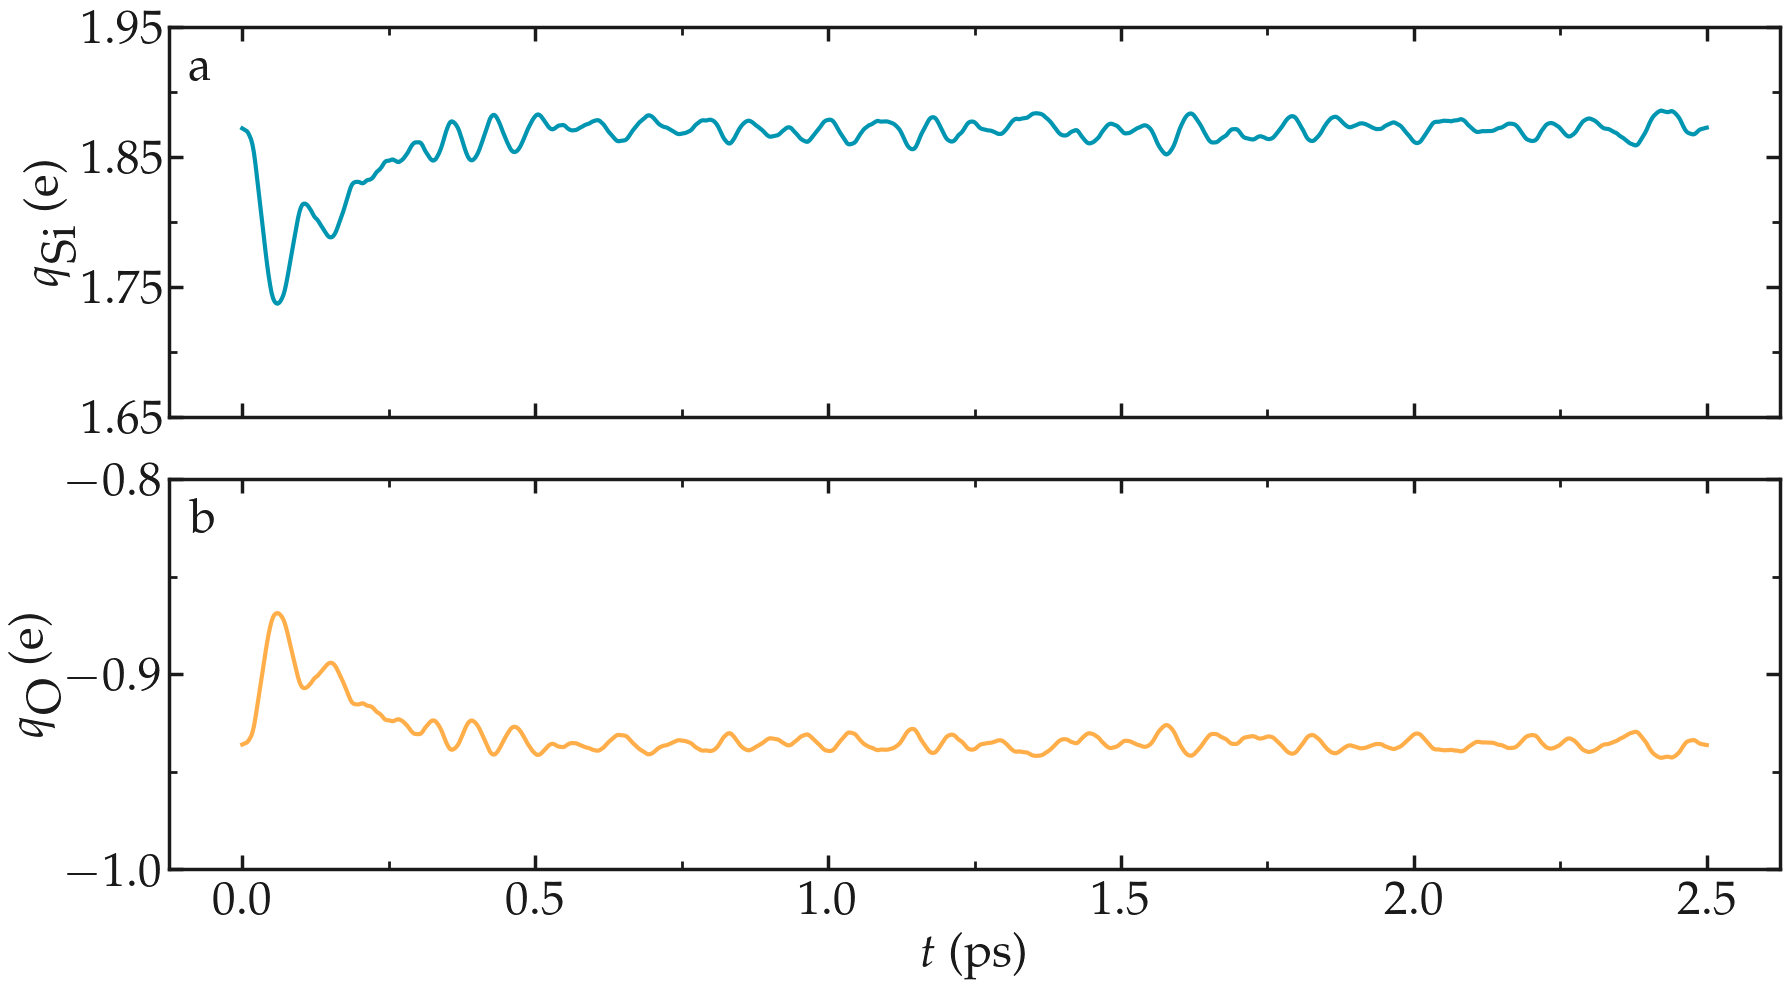

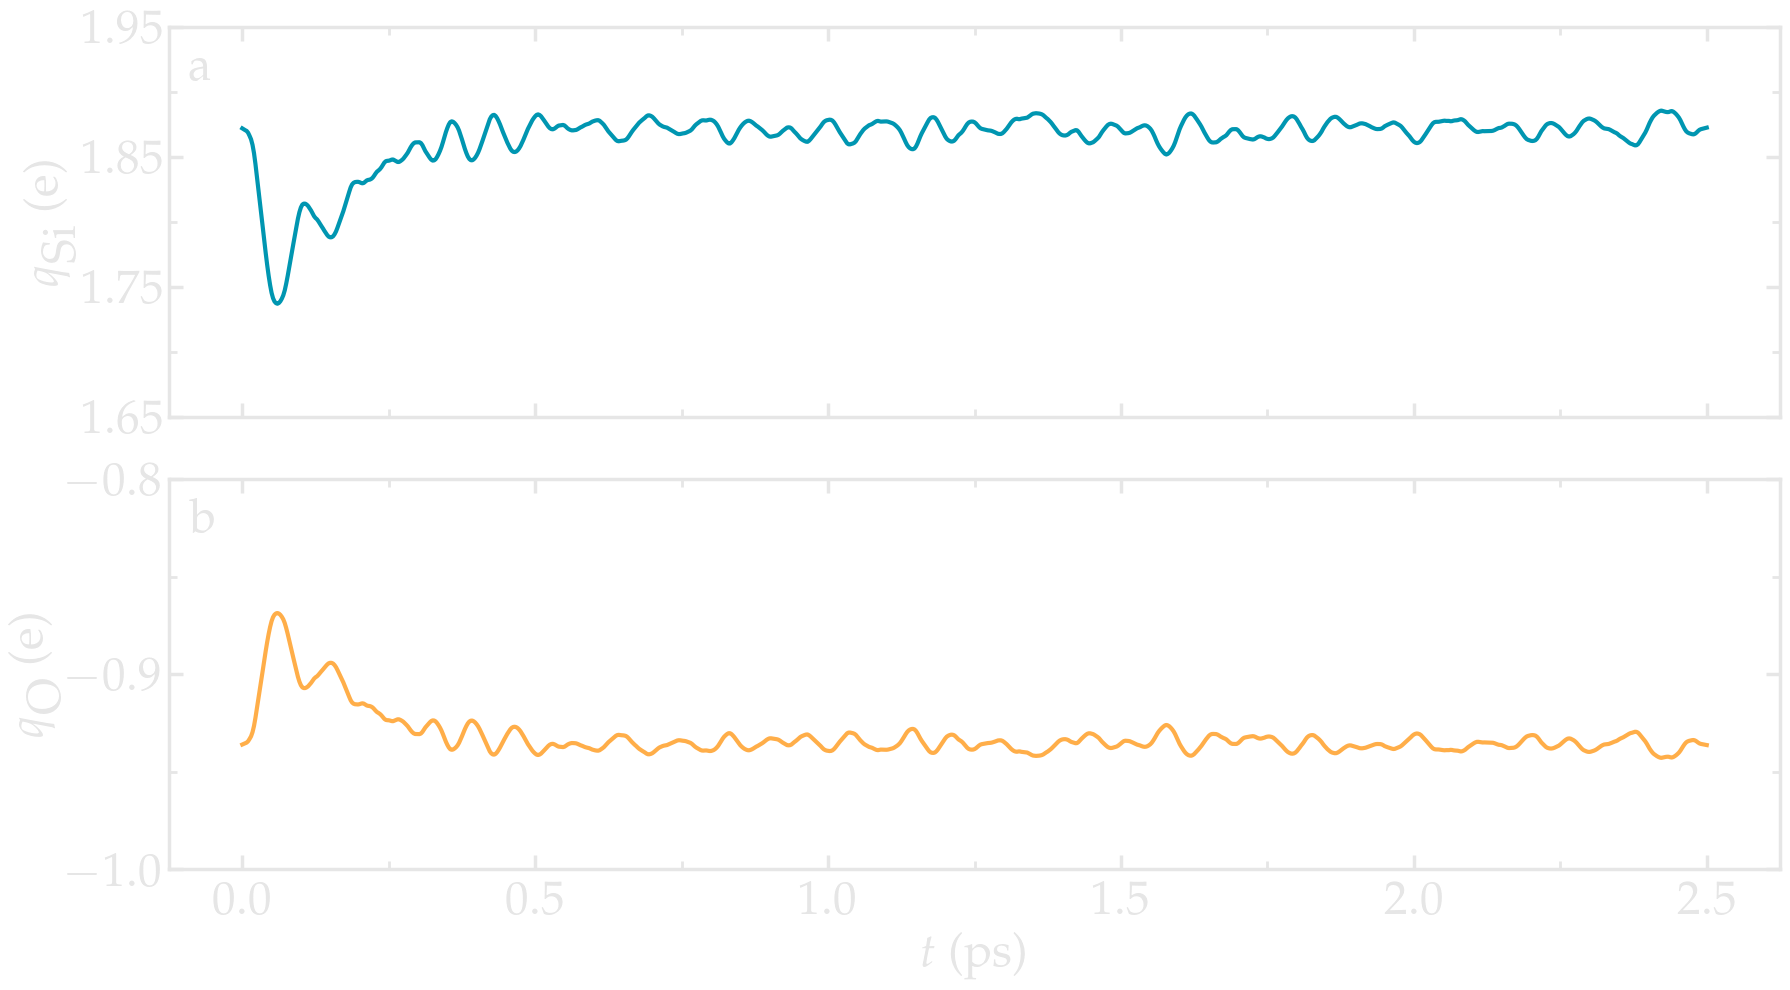

In [4]:
filename = "average-charge"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qSi, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], None, r'$q_\textrm{Si}$ (e)', legend=False, axis_color=mygray)
    set_boundaries(plt, y_ticks=np.arange(1.65, 2, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qO, color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], r'$t ~ \textrm{(ps)}$', r'$q_\textrm{O}$ (e)', legend=False,
                    axis_color=mygray, xpad=8)
    set_boundaries(plt, y_ticks=np.arange(-1, -0.75, 0.1))
    add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

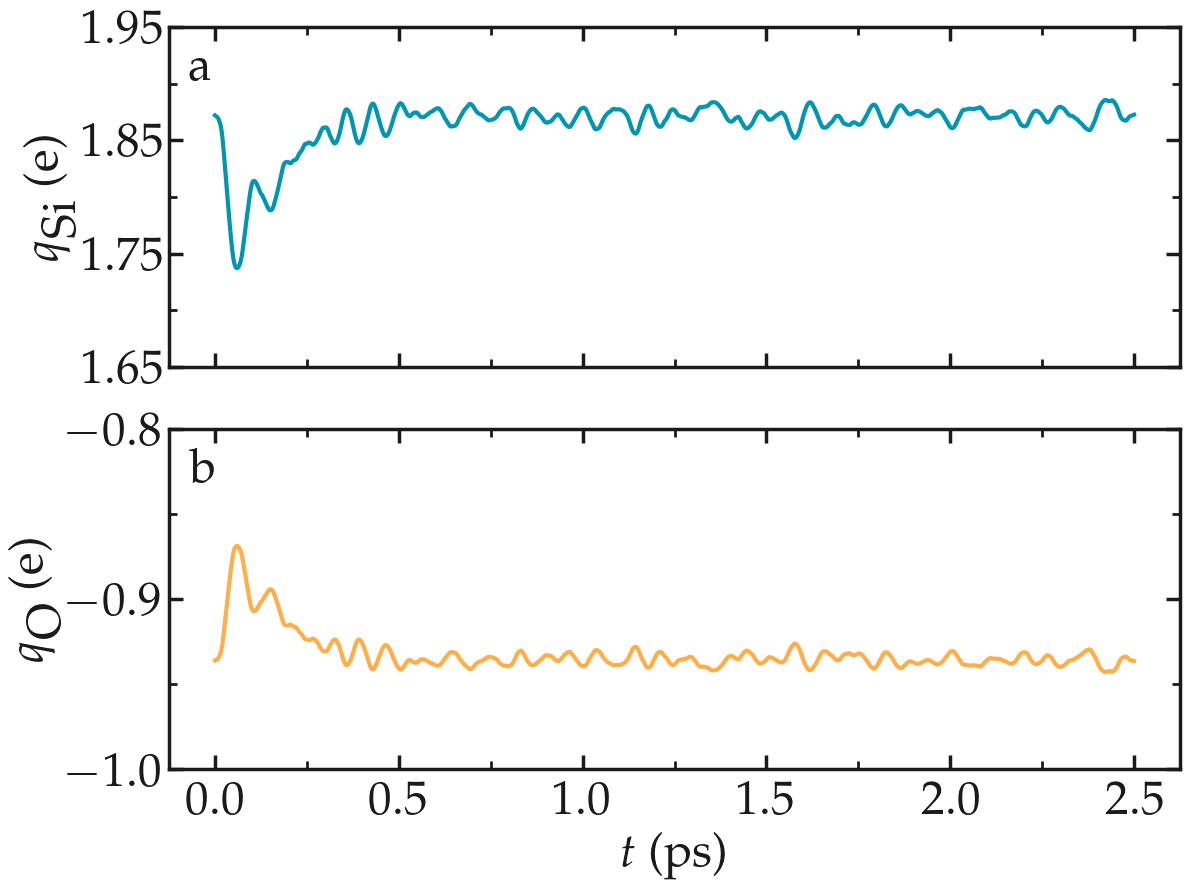

In [5]:
filename = "charge-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,9))
ax, n, l_tot, c_tot = [], 0, 2, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(time/1000, qSi, color=colors["myblue"], linewidth=3)
complete_panel(ax[-1], None, r'$q_\textrm{Si}$ (e)', legend=False, axis_color=mygray)
set_boundaries(plt, y_ticks=np.arange(1.65, 2, 0.1))
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(time/1000, qO, color=colors["myorange"], linewidth=3)
complete_panel(ax[-1], r'$t ~ \textrm{(ps)}$', r'$q_\textrm{O}$ (e)', legend=False,
                axis_color=mygray, xpad=8)
set_boundaries(plt, y_ticks=np.arange(-1, -0.75, 0.1))
add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)

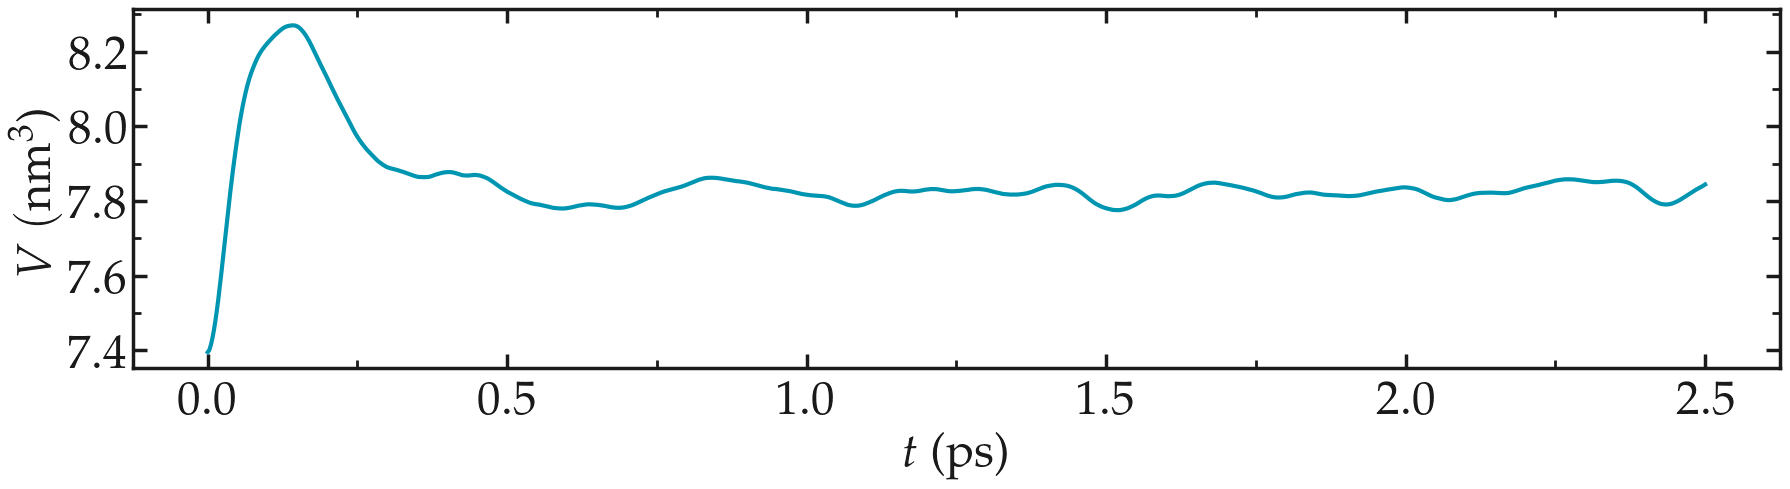

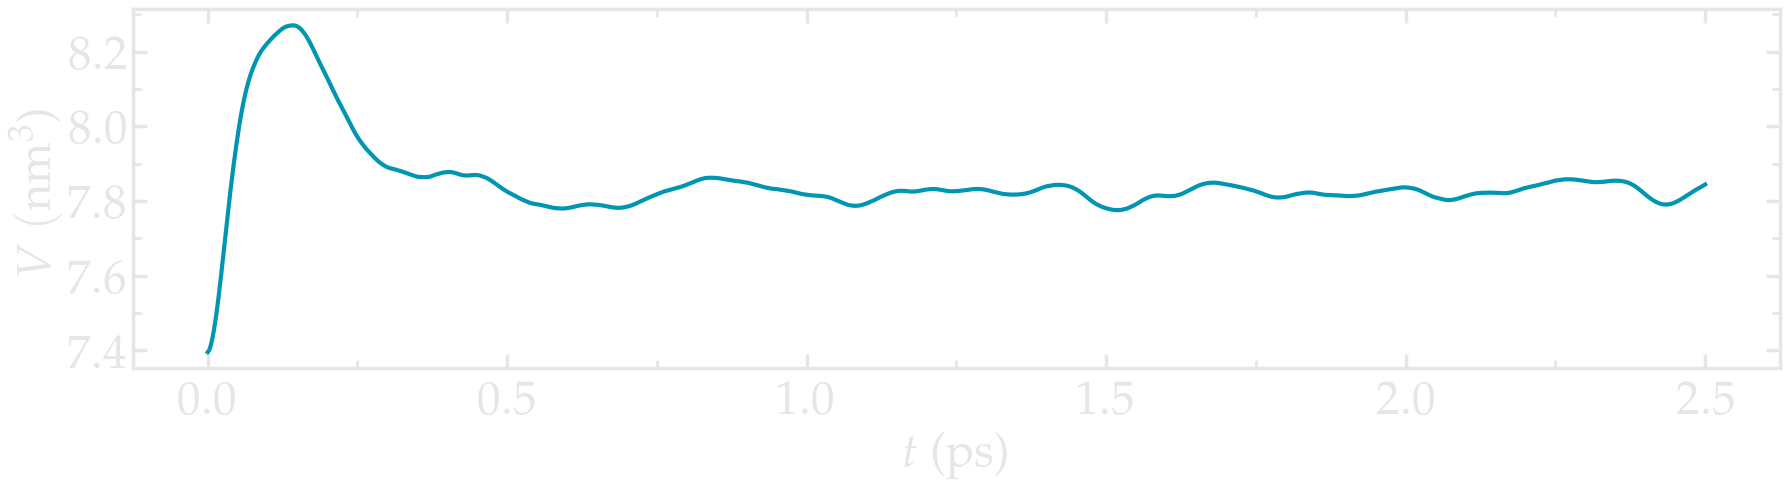

In [6]:
filename = "volume"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,5))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, Volume/1000, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$t ~ \textrm{(ps)}$', r'$V ~ (\textrm{nm}^3$)', legend=False, axis_color=mygray, xpad=8)
    #set_boundaries(plt, y_ticks=np.arange(1.5, 1.93, 0.1))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

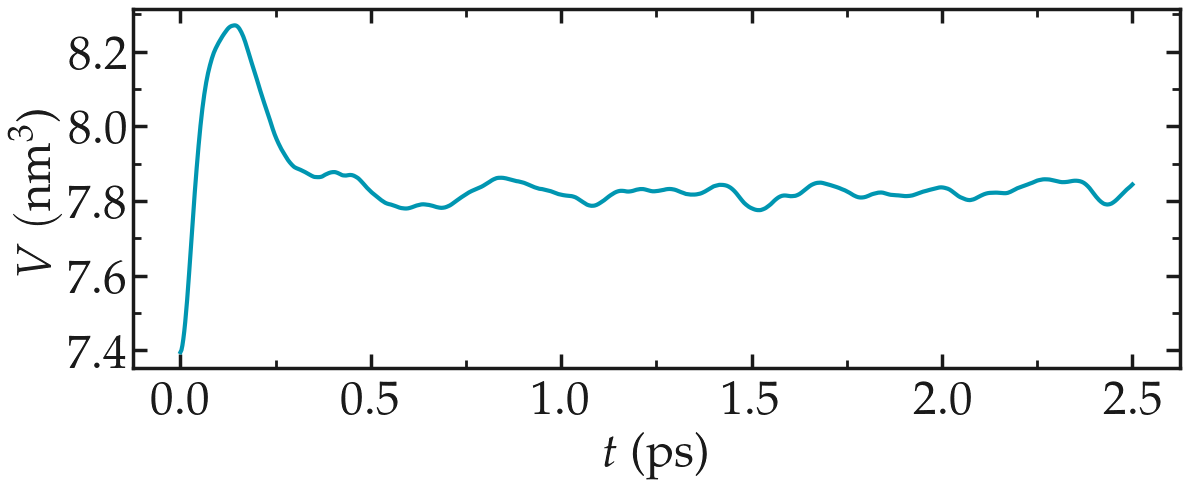

In [7]:
filename = "volume-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(time/1000, Volume/1000, color=colors["myblue"], linewidth=3)
complete_panel(ax[-1], r'$t ~ \textrm{(ps)}$', r'$V ~ (\textrm{nm}^3$)', legend=False, axis_color=mygray, xpad=8)
#set_boundaries(plt, y_ticks=np.arange(1.5, 1.93, 0.1))
#add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)